In [ ]:
#2.0.1 Número Factoriales
import numpy as np
import math as mt

def Factorial(x):
    f = mt.factorial(x)
    return f

i = 20
l = []
while i >= 0:
    f = Factorial(i)
    l.append(f)
    i -=1

np.array(l)

array([2432902008176640000,  121645100408832000,    6402373705728000,
           355687428096000,      20922789888000,       1307674368000,
               87178291200,          6227020800,           479001600,
                  39916800,             3628800,              362880,
                     40320,                5040,                 720,
                       120,                  24,                   6,
                         2,                   1,                   1])

Dentro del conjunto de datos, los máximos locales son: 
 [1.036267, 1.03554, 1.024369, 1.045406, 1.012803, 1.030349, 1.015571, 1.035833, 1.017348, 1.02287, 1.013802, 1.020233, 1.034254, 1.02666, 1.014296, 1.024395, 1.040716, 1.027063, 1.039316, 1.060527, 1.051431, 1.089617, 1.330906, 1.032746, 1.031765, 1.068328, 1.102898, 1.064289, 1.040364, 1.079907, 1.000827, 1.089922, 1.030706, 1.025699, 0.9971942, 1.008569, 1.041762, 1.028908, 1.029255, 1.147828, 1.657519] 
Para un total de 41 máximos.


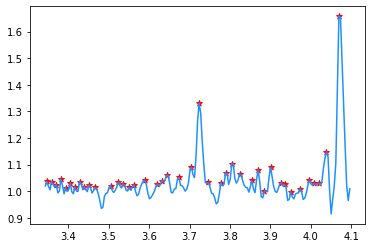

In [ ]:
#2.0.2 Máximos de los datos
import pandas as pd
import matplotlib.pyplot as plt
archivo = pd.read_csv("https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt")
archivonp = archivo.to_numpy()
valores_y=[]
valores_x=[]
maximos= []

for i in archivonp:
  for j in i:
      a = j.split()
      valores_y.append(a[1])
      valores_x.append(a[0])

valores_y_f = []
valores_x_f = []
for i in range(0,len(valores_y)):
  valores_y_f.append(float(valores_y[i]))
  valores_x_f.append(float(valores_x[i]))

maxim = valores_y_f[0]
t = 1

if maxim < valores_y_f[t]:
    while t < (len(valores_y_f)-1):    
        if maxim < valores_y_f[t]:
            maxim = valores_y_f[t]
            t +=1
        elif maxim > valores_y_f[t]:
            maximos.append(maxim)
            count=0
            while maxim > valores_y_f[t+count]:
                maxim = valores_y_f[t+count]
                count +=1
            t += count
elif maxim > valores_y_f[t]:
    while t < (len(valores_y_f)-1):
        if maxim > valores_y_f[t]:
            maximos.append(maxim)
            count=0
            while maxim > valores_y_f[t+count]:
                maxim = valores_y_f[t+count]
                count +=1
            t += count
        elif maxim < valores_y_f[t]:
            maxim = valores_y_f[t]
            t +=1
print("Dentro del conjunto de datos, los máximos locales son: \n",maximos,"\nPara un total de",len(maximos),"máximos.")

x_plot = []
for i in range(0,len(maximos)):
  p = valores_y_f.index(maximos[i])
  x_plot.append(valores_x_f[p])

plt.plot(valores_x_f,valores_y_f,color="dodgerblue")
plt.scatter(x_plot,maximos,color='r',marker='*')

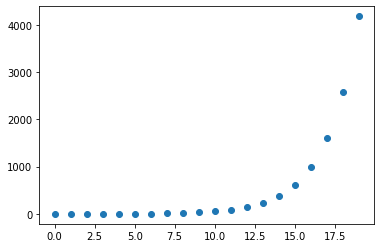

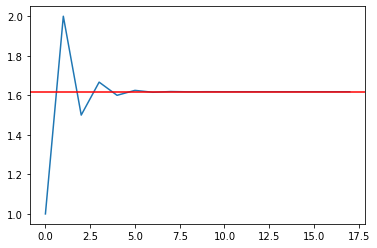

In [ ]:
#2.0.3 Números de Fibonacci
import matplotlib.pyplot as plt
f = [0,1]
x = list(range(0,20))
while len(f)<20:
    i = len(f)
    fn = f[i-1] + f[i-2]
    f.append(fn)
a = []
c = 1
while len(a)<20 and c<19:
    a.append(f[c+1]/f[c])
    c += 1
plt.figure(1)
plt.scatter(x,f)
plt.figure(2)
plt.plot(x[0:18],a)
plt.axhline(y=((1+mt.sqrt(5))/2),color='r')

Demostración:

https://drive.google.com/file/d/1R39xa0wE5RO8zhJxpzBpfZJUlq_ywZPP/view?usp=sharing

El orden de h es 2:

https://drive.google.com/file/d/1Nuh0cpAGI9DAsNtCHQxbBEyVPCkBJtYJ/view?usp=sharing


/usr/local/lib/python3.8/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr/local/lib/python3.8/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


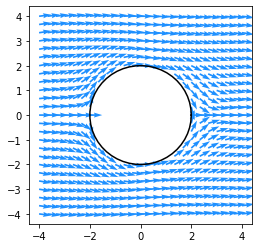

In [ ]:
#3.6 Campo Vectorial

N = 25
xi = -4
xf = 4
x = np.linspace(xi,xf,N)
y = x.copy()


Vel = 2
Rad = 2
h=1e-4

def funcion_potencial_flujo(Vel,x,y,Rad):
    f = (Vel*x)*(1-((Rad**2)/((x**2)+(y**2))))
    return f

def Derivativex(f,x,y,h):
    return (f(Vel,x+h,y,Rad)-f(Vel,x-h,y,Rad))/(2*h)

def Derivativey(f,x,y,h):
    return (f(Vel,x,y+h,Rad)-f(Vel,x,y-h,Rad))/(2*h)

def calc_derivada_x(x,y,h):
    derivada_x= Derivativex(funcion_potencial_flujo,x,y,h)
    return derivada_x

def calc_derivada_y(x,y,h):
    derivada_y=-1*Derivativey(funcion_potencial_flujo,x,y,h)
    return derivada_y

def campo_vel():
    Cfx= np.zeros((N,N))
    Cfy = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if ((x[j])**2 + (y[i])**2 >= Rad**2 ):
                Cfx[i,j] = calc_derivada_x(x[j],y[i],h)
                Cfy[i,j] = calc_derivada_y(x[j],y[i],h)
    return Cfx,Cfy


Cfx,Cfy = campo_vel()

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

for i in range(N):
    for j in range(N):
        
        ax.quiver(x[i],y[j],Cfx[i,j],Cfy[i,j],color="dodgerblue")

theta=np.linspace(0,2*np.pi,50)
coor_x=np.zeros(50)
coor_y=coor_x.copy()
coor_x[:]=Rad*np.cos(theta)
coor_y[:]=Rad*np.sin(theta)

ax.plot(coor_x,coor_y,color="black")

array([-1.8471, -0.    ,  0.1805])

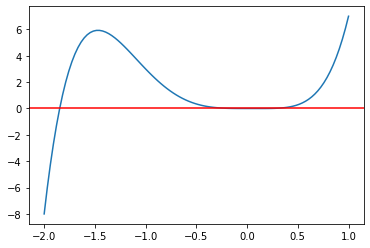

In [ ]:
#Raices de polinomios, ejercicio 3

def Function(x):
    return (3*x**5) + (5*x**4) - (x**3)

x = np.linspace(-2,1,100)
y = Function(x)

plt.plot(x,y)
plt.axhline(y=0,color='r')

def Derivative(f,x,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)

def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-5):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            
            error = np.abs(f(xn)/df(f,xn))
            
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn
    
def GetAllRoots(x,tolerancia=4):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonRaphson(Function,Derivative,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
        
    return Roots
x = np.linspace(-1,1,10000)
Roots = GetAllRoots(x)
Roots